<a href="https://colab.research.google.com/github/MohauKhakhu/ptyhon/blob/main/exam_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: load the xls dataset

import pandas as pd

# Replace 'your_dataset.xls' with the actual path to your dataset
df = pd.read_excel('pimaDiabetes.xls')

# Print the first few rows of the dataframe to check if it loaded correctly
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
summary_stats=df.describe()
print("summary Statistic: \n", summary_stats)

df_filled=df.fillna(df.median(numeric_only=True))
#handling missing values by filling them with the median of the respective columnn
#save the cleaned dataframe to a new csv file
df_filled.to_csv('cleaned_diabetes_data.csv', index=False)

summary Statistic: 
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

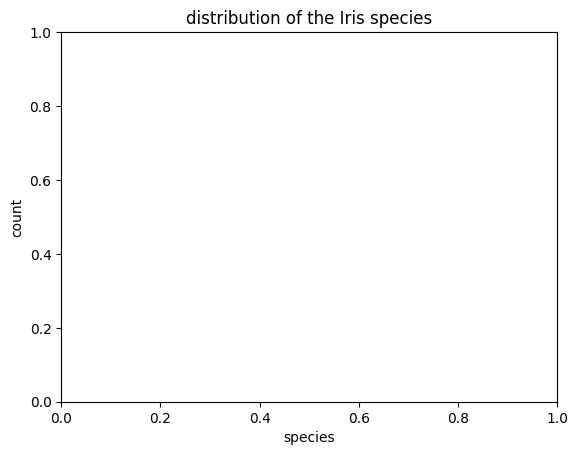

correlation matrix: 
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose            

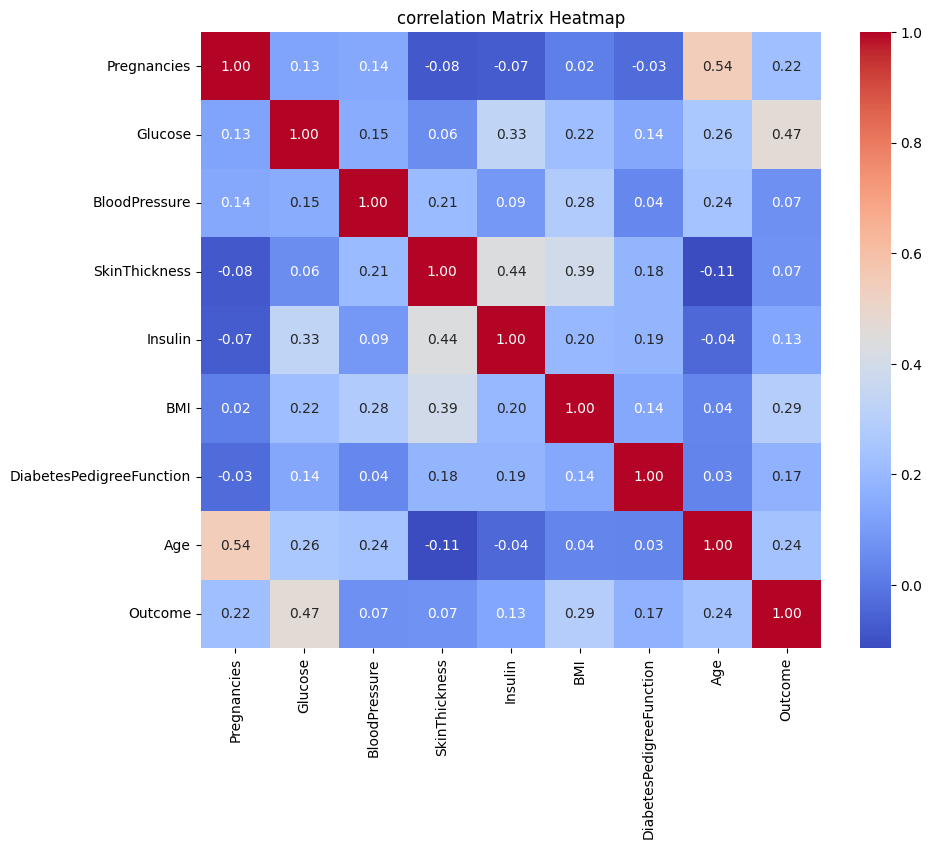

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#create a bar chart showing the distribution of the data
species_counts=df['Outcome'].value_counts()
plt.title('distribution of the Iris species')
plt.xlabel('species')
plt.ylabel('count')
plt.show()
#calculate the correlation matrix between numerical features
numerical_df=df.select_dtypes(include=['float64','int64'])
correlation_matrix=numerical_df.corr()
print("correlation matrix: \n", correlation_matrix)
#plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix Heatmap')

plt.show()

In [ ]:
dataset = pd.read_csv('cleaned_diabetes_data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)


[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test, y_pred)

[[110  20]
 [ 33  29]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

from matplotlib.colors import ListedColormap
X_set, y_set=sc.inverse_transform(X_train), y_train
X1, X2= np.meshgrid(np.arange(start=X_set[:,0].min()-10, stop=X_set[:,0].max()+10, step=0.25),
                   np.arange(start=X_set[:,1].min()-1000, stop=X_set[:,1].max()+1000, step=0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title('Random Forest Classification (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()


ValueError: X has 2 features, but StandardScaler is expecting 8 features as input.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# This line was incorrectly placed and causing the error.
# It should be removed or moved to a more appropriate place in the code
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

from matplotlib.colors import ListedColormap
X_set, y_set=X_train, y_train  # Use X_train instead of inverse_transform
# Creating the meshgrid with all 8 features
X_mesh = np.array([X_set[:, i].ravel() for i in range(X_set.shape[1])])
# Generating a grid of points for prediction
X1, X2 = np.meshgrid(np.arange(start=X_mesh[0].min()-10, stop=X_mesh[0].max()+10, step=0.25),
                   np.arange(start=X_mesh[1].min()-1000, stop=X_mesh[1].max()+1000, step=0.25))

# Reshape the grid to have 8 features like the training data
X_grid = np.array([X1.ravel(), X2.ravel()] + [X_mesh[i].ravel() for i in range(2, X_set.shape[1])]).T

# Now, use sc.transform with X_grid which has 8 features
plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title('Random Forest Classification (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

histogram

In [ ]:
import plotly.express as px
import pandas as pd
df=pd.read_csv('cleaned_diabetes_data.csv')
fig=px.histogram(df, x='Age', nbins=30, title='Distribution of Age')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
df=pd.read_csv('cleaned_diabetes_data.csv')
fig=px.histogram(df, x='BMI', nbins=30, title='Distribution of BMI')
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_diabetes_data.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Describe the K-Nearest Neighbours (KNN) algorithm. How does KNN classify a new data point,
and what are the key factors that influence its performance?
Answer: The K-Nearest Neighbours (KNN) algorithm is a simple, instance-based learning algorithm
used for classification and regression tasks. KNN classifies a new data point based on the majority
class of its 'k' nearest neighbours in the training dataset. Here's how it works:
o Distance Calculation: The algorithm calculates the distance (commonly Euclidean distance)
between the new data point and all points in the training set.
o Selecting Neighbours: It then identifies the 'k' nearest neighbours (data points) to the new
data point.
o Majority Voting: For classification, the algorithm assigns the most common class among the
'k' neighbours to the new data point. For regression, it takes the average of the 'k' neighbours’
values.
o Key Factors Influencing Performance:
§ Choice of 'k': A small 'k' can make the algorithm sensitive to noise, while a large 'k'
might smooth out local patterns, leading to underfitting.
§ Distance Metric: The choice of distance metric (e.g., Euclidean, Manhattan) affects
how distances are measured and, consequently, the classification.
§ Feature Scaling: Since KNN relies on distance calculations, features should be
normalized or scaled to ensure that no single feature disproportionately influences the
results